In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [35]:
data = pd.read_parquet("PlaylistTracks.parquet")

In [36]:
x = data.loc[:, ['tempo','track_duration_secs']].values

In [37]:
wcss = []

In [38]:
for i in range(1,11,1):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

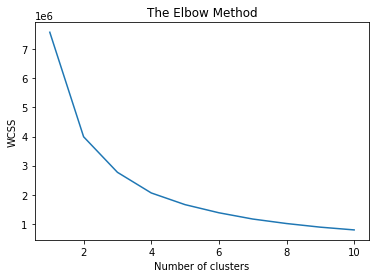

In [39]:
plt.plot(range(1,11,1),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [40]:
kmeans = KMeans(n_clusters = 4, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [41]:
data['cluster'] = y_kmeans

In [42]:
data.groupby('cluster').agg({
    'danceability':np.mean,
    'energy':np.mean,
    'instrumentalness':np.mean,
    'liveness':np.mean,
    'tempo':np.mean,
    'track_duration_secs':np.mean
})

,danceability,energy,instrumentalness,liveness,tempo,track_duration_secs
cluster,,,,,,
0,0.448549,0.813577,0.113693,0.223903,134.289568,169.535980
1,0.436848,0.717942,0.215549,0.185329,129.859103,318.933036
2,0.471563,0.761215,0.154579,0.201361,128.703101,233.628774
3,0.359929,0.726179,0.226812,0.209968,129.057607,516.000000
